1. Preprocess the Data:

Download and extract the Cats vs Dogs dataset here.
Use ImageDataGenerator to rescale and augment the training images (e.g., horizontal flip, rotation, zoom, and shifts).
Here is a hint:



train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                       directory=train_dir,
                                                       shuffle=True,
                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=validation_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')


Create separate generators for training and validation data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zip_path = '/content/drive/My Drive/horse-or-human.zip'

In [5]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/extracted_folder/horse-or-human/train"
validation_dir = "/content/extracted_folder/horse-or-human/validation"

IMG_HEIGHT = 128
IMG_WIDTH = 128
batch_size = 32

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                       directory=train_dir,
                                                       shuffle=True,
                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=validation_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


2. Build the Model:

Create a CNN with:
Three convolutional layers with ReLU activation and max-pooling.
Dropout layers to reduce overfitting.
A fully connected layer with 512 units and ReLU activation.
An output layer with a single unit and sigmoid activation for binary classification.
Compile the model using the Adam optimizer and binary cross-entropy loss.

In [11]:
#Model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Train the Model:

Train the model on the augmented training data for 15 epochs.
Use the validation data to monitor performance during training.

In [12]:
#Train model
history = model.fit(
    train_data_gen,
    epochs= 15,            # Let it run for enough epochs to find the best spot
    validation_data= val_data_gen,
    batch_size = batch_size,
    verbose= True
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 679ms/step - accuracy: 0.6514 - loss: 0.7161 - val_accuracy: 0.7148 - val_loss: 1.8049
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 680ms/step - accuracy: 0.9693 - loss: 0.0768 - val_accuracy: 0.7344 - val_loss: 2.2845
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 697ms/step - accuracy: 0.9725 - loss: 0.0710 - val_accuracy: 0.8438 - val_loss: 1.3870
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 692ms/step - accuracy: 0.9944 - loss: 0.0265 - val_accuracy: 0.8398 - val_loss: 1.6312
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 696ms/step - accuracy: 0.9993 - loss: 0.0056 - val_accuracy: 0.8398 - val_loss: 2.0730
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 691ms/step - accuracy: 0.9818 - loss: 0.0481 - val_accuracy: 0.8477 - val_loss: 1.1057
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 671ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.8672 - val_loss: 1.1854
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 693ms/step - accuracy: 0.9904 - loss: 0.0227 - val_accu

4. Evaluate the Model:

Plot the training and validation accuracy and loss to detect overfitting.
Analyze the impact of data augmentation and dropout on model performance.

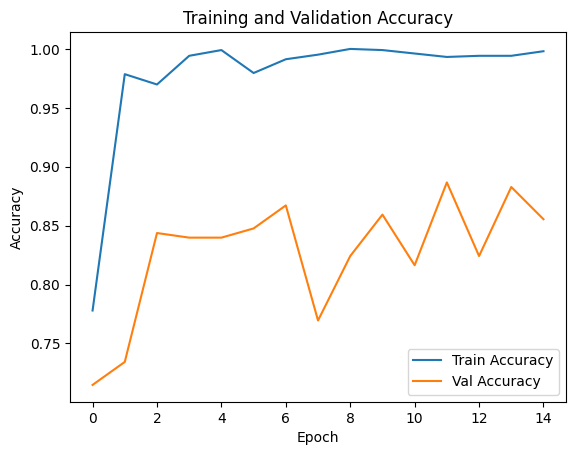

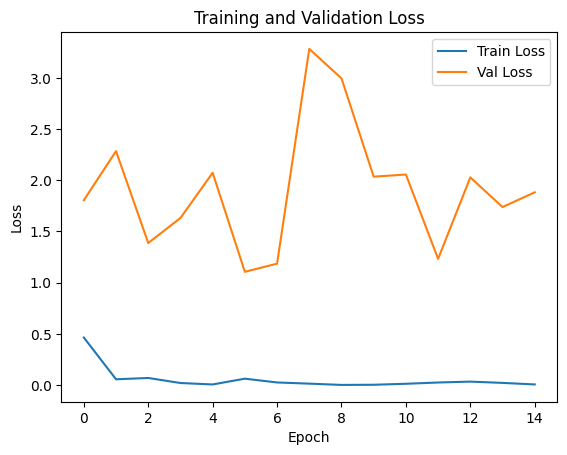

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

5. Bonus:

Retry training the model after Data augmentation: Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.
There is multiple methods to augment data:

Apply horizontal flip
Randomly rotate the image
Apply zoom augmentation
Here the code for Data Augmentation

## Apply horizontal flip
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
# Found 2000 images belonging to 2 classes.
# Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


## Randomly rotate the image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Found 2000 images belonging to 2 classes.


## Apply zoom augmentation
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.
#Put it all together
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
Found 2000 images belonging to 2 classes.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Create validation data generator

image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')
Found 1000 images belonging to 2 classes.

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 738ms/step - accuracy: 0.9618 - loss: 0.0896 - val_accuracy: 0.7461 - val_loss: 2.3333
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 735ms/step - accuracy: 0.9783 - loss: 0.0513 - val_accuracy: 0.6602 - val_loss: 3.3914
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 753ms/step - accuracy: 0.9622 - loss: 0.1115 - val_accuracy: 0.6719 - val_loss: 1.7580
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 727ms/step - accuracy: 0.9761 - loss: 0.0815 - val_accuracy: 0.7227 - val_loss: 2.2468
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 740ms/step - accuracy: 0.9764 - loss: 0.0643 - val_accuracy: 0.6523 - val_loss: 2.8926
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 754ms/step - accuracy: 0.9750 - loss: 0.0630 - val_accuracy: 0.6836 - val_loss: 2.7602
Epoch 7/15
33/33 

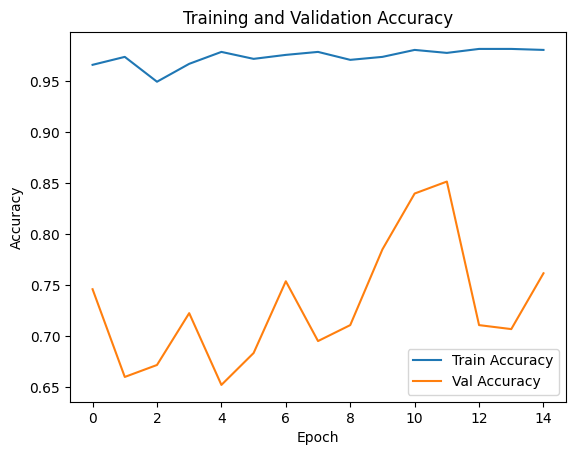

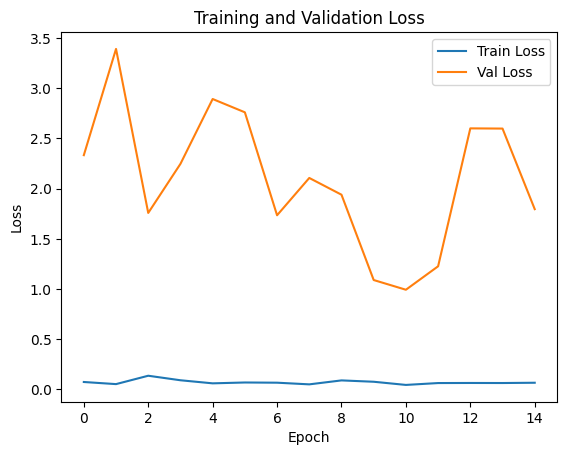

In [16]:
## Apply horizontal flip
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
# Found 2000 images belonging to 2 classes.
# Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

## Randomly rotate the image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Found 2000 images belonging to 2 classes.

## Apply zoom augmentation
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

#Found 2000 images belonging to 2 classes.

#Put it all together
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
#Found 2000 images belonging to 2 classes.

image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')
#Found 1000 images belonging to 2 classes.

#Train model
history = model.fit(
    train_data_gen,
    epochs= 15,            # Let it run for enough epochs to find the best spot
    validation_data= val_data_gen,
    verbose= True
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()